## Periodicity and the sinusoidal model

In this notebook, we'll start by looking at the concept of periodicity and how this leads us to our first mathematical model of sound - the sinusoidal model. Hit the live code button in the top right corner, run the first cell below to import all the packages, and carry on with the notebook!


In [ ]:
# Hit the live python code button and firstly run this cell to import the necessary packages we'll need.
%pip install ipympl
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib import patches 
from matplotlib.lines import Line2D
from matplotlib import animation
from ipywidgets import * # interactive plots
import IPython
from IPython.display import Audio, display
%matplotlib ipympl

# This is a CSS style for the animation controls in this notebook.
controls_css = """
<style>
.anim-controls button {
    font-size: 4px !important;
    padding: 2px 10px !important;
}
.anim-controls {
    margin-top: 4px;
}
</style>
"""


### Thinking about a period as a circle

Move the slider to see how the plot changes as you change the angle (in degrees)


interactive(children=(IntSlider(value=0, description='angle', max=360), Output()), _dom_classes=('widget-inter…

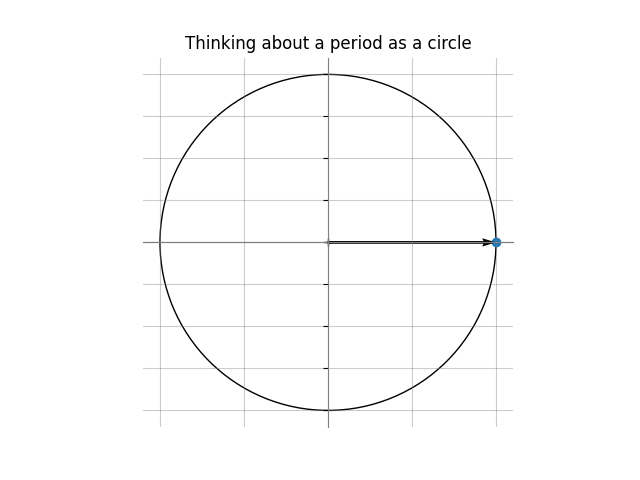

In [19]:
f = 1 # frequency in Hz

# Unit circle
xO,yO = (0,0)  # origin
UnitCircle = patches.Circle((0.0, 0.0), radius=1,edgecolor="black",facecolor="none") # This is for plotting the unit circle

# Setting up figure
fig, ax = plt.subplots() # this sets up our figure environment. fig is a handle for the figure and ax is a handle for the axis
ax.add_patch(UnitCircle) 
ax.plot(xO,yO,'k+')
ax.set_aspect('equal')
ax.grid(color='gray', alpha=0.01)  # Grid lines
plt.gca().tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# Customize the color and transparency of the axes and grid lines
plt.gca().spines['top'].set_color('gray')           # Top spine
plt.gca().spines['bottom'].set_color('gray')        # Bottom spine
plt.gca().spines['left'].set_color('gray')          # Left spine
plt.gca().spines['right'].set_color('gray')         # Right spine


cn = ax.scatter([], []) # this command makes a scatter plot of x and y values
qc = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
qr = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1,color='blue') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
qi = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1,color='orange') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)

ax.set_title('Thinking about a period as a circle')
# These commands are just decorations on the plot 
ax.set_xlim([-1.1, 1.1]) # sets x and y limits of the plot 
ax.set_ylim([-1.1, 1.1])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')

    
# Create the interactive plot
def update(angle = 0): # in the brackets here is the initial value of the variable you want to put on the slider
    angle=angle/360
    omega = 2*np.pi*f # Angular frequency (rad/s)
    theta = omega*angle

    z = np.exp(1j*theta) # Define the complex exponential
    
    # These update the plots
    cn.set_offsets([z.real, z.imag])
    qc.set_UVC(z.real, z.imag)
    fig.canvas.draw_idle()


print('Move the slider to see how the plot changes as you change the angle (in degrees)')
interact(update, angle = (0,360,1)); # this creates the range for the slider. here time goes for 0 to 40s in intervals of 0.001s




### Relating angle to time

We want to make a mathematical relationship so that at any time, $t$ (seconds), we will be able to tell how much of an angle we have swept through (from the initial horizontal position along the positive x-axis).

Let us firstly define the **fundamental period** as the time it takes to sweep through $2 \pi$ radians (1 revolution around the circle) and denote it with the symbol T (with units of seconds).

We can therefore express the relationship between angle and time as:
\begin{equation}
\phi =  2 \pi \cdot \frac{ t}{T}
\end{equation}


Move the slider to observe changes over time (seconds)


interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.001), Output()), _dom_classes=('…

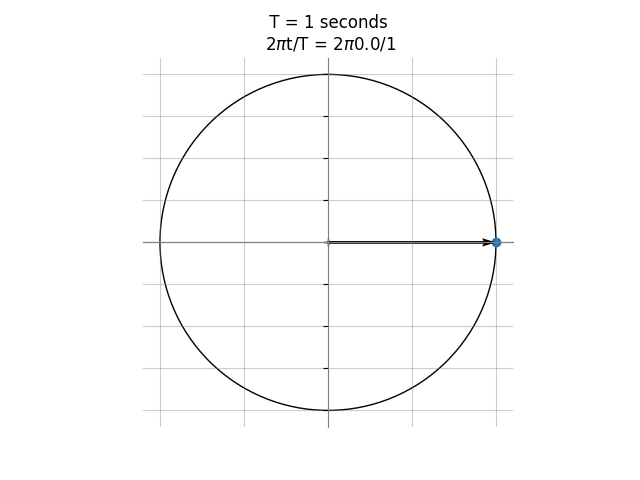

In [20]:
# You can change this value and re-run the cell to see how things change as well.
T = 1
f = 1/T # frequency in Hz

# Unit circle
xO,yO = (0,0)  # origin
UnitCircle = patches.Circle((0.0, 0.0), radius=1,edgecolor="black",facecolor="none") # This is for plotting the unit circle

# Setting up figure
fig, ax = plt.subplots() # this sets up our figure environment. fig is a handle for the figure and ax is a handle for the axis
ax.add_patch(UnitCircle) 
ax.plot(xO,yO,'k+')
ax.set_aspect('equal')
ax.grid(color='gray', alpha=0.01)  # Grid lines
plt.gca().tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# Customize the color and transparency of the axes and grid lines
plt.gca().spines['top'].set_color('gray')           # Top spine
plt.gca().spines['bottom'].set_color('gray')        # Bottom spine
plt.gca().spines['left'].set_color('gray')          # Left spine
plt.gca().spines['right'].set_color('gray')         # Right spine

cn = ax.scatter([], []) # this command makes a scatter plot of x and y values
qc = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
qr = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1,color='blue') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
qi = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1,color='orange') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)

# These commands are just decorations on the plot 
ax.set_xlim([-1.1, 1.1]) # sets x and y limits of the plot 
ax.set_ylim([-1.1, 1.1])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')
    
    
# Create the interactive plot
def update(t = 0): # in the brackets here is the initial value of the variable you want to put on the slider

    omega = 2*np.pi*f # Angular frequency (rad/s)
    theta = omega*t

    z = np.exp(1j*theta) # Define the complex exponential
    
    # These update the plots
    cn.set_offsets([z.real, z.imag])
    qc.set_UVC(z.real, z.imag)
    ax.set_title('Introducing time... \n \n T = '+str(T)+' seconds \n 2$\pi$t/T = 2$\pi$'+str(np.round(t,decimals=3))+'/'+str(T))
    fig.canvas.draw_idle()


print('Move the slider to observe changes over time (seconds)')
interact(update, t = (0,1,0.001)); # this creates the range for the slider. here time goes for 0 to 40s in intervals of 0.001s





### The concept of frequency


Consider a period, T = 0.1s

In 0.1s, there is 1 period

Hence, in 1s, there will be 1/0.1 = 10 periods

**We define frequency as the number of periods per second**.

We define it as f = 1/T with a unit of Hz.

Hence we can express the angle in terms of frequency instead of the period as follows:
\begin{equation}
\phi =  2 \pi \cdot \frac{ t}{T} =  2 \pi  f t
\end{equation}


Move the slider to observe changes over time (seconds) and the period, T (seconds).


interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, step=0.001), FloatSlider(value=5.0, de…

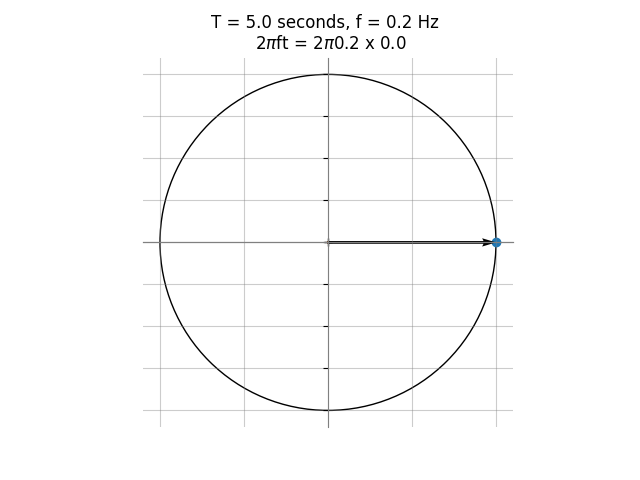

In [21]:
# Unit circle
xO,yO = (0,0)  # origin
UnitCircle = patches.Circle((0.0, 0.0), radius=1,edgecolor="black",facecolor="none") # This is for plotting the unit circle

# Setting up figure
fig, ax = plt.subplots() # this sets up our figure environment. fig is a handle for the figure and ax is a handle for the axis
ax.add_patch(UnitCircle) 
ax.plot(xO,yO,'k+')
ax.set_aspect('equal')
ax.grid(color='gray', alpha=0.01)  # Grid lines
plt.gca().tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# Customize the color and transparency of the axes and grid lines
plt.gca().spines['top'].set_color('gray')           # Top spine
plt.gca().spines['bottom'].set_color('gray')        # Bottom spine
plt.gca().spines['left'].set_color('gray')          # Left spine
plt.gca().spines['right'].set_color('gray')         # Right spine

cn = ax.scatter([], []) # this command makes a scatter plot of x and y values
qc = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
qr = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1,color='blue') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
qi = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1,color='orange') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)

# These commands are just decorations on the plot 
ax.set_xlim([-1.1, 1.1]) # sets x and y limits of the plot 
ax.set_ylim([-1.1, 1.1])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')
    
# Create the interactive plot
def update(t = 0, T=5): # in the brackets here is the initial value of the variable you want to put on the slider

    f = 1/T # frequency in Hz

    omega = 2*np.pi*f # Angular frequency (rad/s)
    theta = omega*t

    z = np.exp(1j*theta) # Define the complex exponential
    
    cn.set_offsets([z.real, z.imag])
    qc.set_UVC(z.real, z.imag)

    ax.set_title('T = '+str(np.round(T,decimals=3))+' seconds, f = '+str(np.round(f,decimals=3))+ ' Hz \n 2$\pi$ft = 2$\pi$'+str(np.round(f,decimals=3))+' x '+str(np.round(t,decimals=3)))
    fig.canvas.draw_idle()


print('Move the slider to observe changes over time (seconds) and the period, T (seconds).')
widgets.interact(update, t = (0,10,0.001), T=(0.1, 10, 0.1)); # this creates the range for the slider. here time goes for 0 to 40s in intervals of 0.001s





### Trig relationships

Don't need a python code here, just a photo to explain...

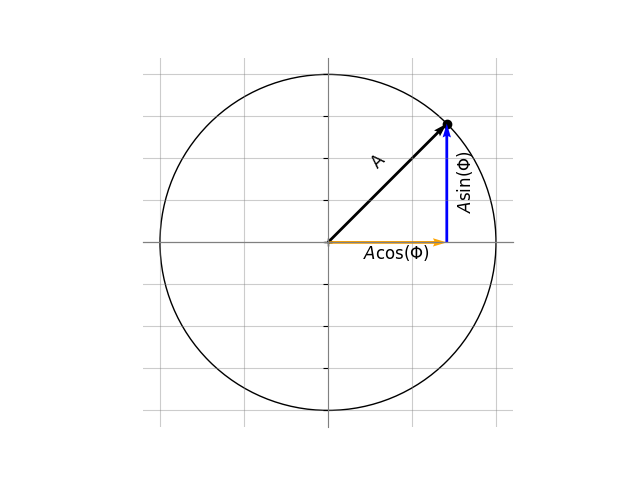

In [22]:
# TRIG RELATIONS:

# You can change this value and re-run the cell to see how things change as well.
T = 1
f = 1/T # frequency in Hz

z_mod = 1 
z_arg = np.pi/4 
z = z_mod*np.exp(1j*z_arg)

# Unit circle
xO,yO = (0,0)  # origin
UnitCircle = patches.Circle((0.0, 0.0), radius=1,edgecolor="black",facecolor="none") # This is for plotting the unit circle

# Setting up figure
fig, ax = plt.subplots() # this sets up our figure environment. fig is a handle for the figure and ax is a handle for the axis
ax.add_patch(UnitCircle) 
ax.plot(xO,yO,'k+')
ax.set_aspect('equal')
ax.grid(color='gray', alpha=0.01)  # Grid lines
plt.gca().tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# Customize the color and transparency of the axes and grid lines
plt.gca().spines['top'].set_color('gray')           # Top spine
plt.gca().spines['bottom'].set_color('gray')        # Bottom spine
plt.gca().spines['left'].set_color('gray')          # Left spine
plt.gca().spines['right'].set_color('gray')         # Right spine


#ax.set_xticks([])
# ax.set_yticks([])

cn = ax.scatter([], []) # this command makes a scatter plot of x and y values
# qc = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
# qr = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1,color='orange') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
# qi = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1,color='blue') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
# ax.text(1, 0, "$ \cos(\omega t)$", fontsize=12,position=(1-0.1,0.05))
# ax.text(0, 1, "$ \sin(\omega t)$", fontsize=12,rotation = 90, position=(0.05,1))

# ax.set_xlabel('Real Part',loc='right')
# ax.set_ylabel('Imag Part',loc='top')


# fig, ax = plt.subplots() # this sets up our figure environment. fig is a handle for the figure and ax is a handle for the axis
ax.scatter(z.real, z.imag,label=z, color='k') # this command makes a scatter plot of x and y values
ax.quiver(z.real, z.imag, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
ax.quiver(z.real, 0, angles='xy', scale_units='xy',scale=1,color='orange') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
ax.quiver(z.real, 0,0, z.imag, angles='xy', scale_units='xy',scale=1,color='blue') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
#am1 = AngleAnnotation((0.0,0.0), [0,0], [z.real,z.imag], ax=ax, size=130, text="$\Phi$", textposition = "inside", text_kw=dict(fontsize=10, xytext = (0,-5)))
ax.text(z.real, z.imag, "A", fontsize=12, rotation=(z_arg*(180/np.pi)),position=(z.real/3,z.imag/1.6))
ax.text(z.real, 0, "$A \cos(\Phi)$", fontsize=12,position=(z.real-0.5,-0.1))
ax.text(0, z.imag, "$A \sin(\Phi)$", fontsize=12,rotation = 90, position=(z.real+0.05,0.2))

    
    

# These commands are just decorations on the plot 
ax.set_xlim([-1.1, 1.1]) # sets x and y limits of the plot 
ax.set_ylim([-1.1, 1.1])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')

Move the slider to observe changes over time (seconds)


interactive(children=(FloatSlider(value=0.0, description='t', max=3.0, step=0.001), Output()), _dom_classes=('…

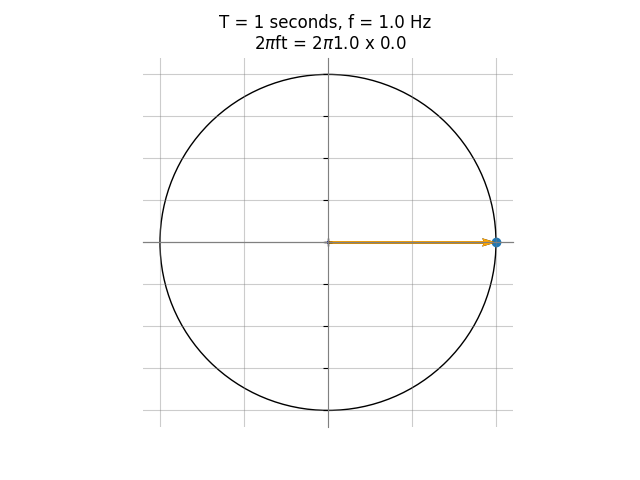

In [23]:
# Horizontal component

# You can change this value and re-run the cell to see how things change as well.
T = 1
f = 1/T # frequency in Hz

# Unit circle
xO,yO = (0,0)  # origin
UnitCircle = patches.Circle((0.0, 0.0), radius=1,edgecolor="black",facecolor="none") # This is for plotting the unit circle

# Setting up figure
fig, ax = plt.subplots() # this sets up our figure environment. fig is a handle for the figure and ax is a handle for the axis
ax.add_patch(UnitCircle) 
ax.plot(xO,yO,'k+')
ax.set_aspect('equal')
ax.grid(color='gray', alpha=0.01)  # Grid lines
plt.gca().tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# Customize the color and transparency of the axes and grid lines
plt.gca().spines['top'].set_color('gray')           # Top spine
plt.gca().spines['bottom'].set_color('gray')        # Bottom spine
plt.gca().spines['left'].set_color('gray')          # Left spine
plt.gca().spines['right'].set_color('gray')         # Right spine


#ax.set_xticks([])
# ax.set_yticks([])

cn = ax.scatter([], []) # this command makes a scatter plot of x and y values
qc = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1) # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
qr = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1,color='orange') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
qi = ax.quiver(0, 0, angles='xy', scale_units='xy',scale=1,color='blue') # quiver plots an arrow, where the values are the location of the arrows (see more here: https://matplotlib.org/2.0.2/api/pyplot_api.html)
# ax.text(1, 0, "$ \cos(\omega t)$", fontsize=12,position=(1-0.1,0.05))
# ax.text(0, 1, "$ \sin(\omega t)$", fontsize=12,rotation = 90, position=(0.05,1))

# ax.set_xlabel('Real Part',loc='right')
# ax.set_ylabel('Imag Part',loc='top')

    
    
# Create the interactive plot
def update(t = 0): # in the brackets here is the initial value of the variable you want to put on the slider

    omega = 2*np.pi*f # Angular frequency (rad/s)
    theta = omega*t

    z = np.exp(1j*theta) # Define the complex exponential
    
    # These update the plots
    cn.set_offsets([z.real, z.imag])
    qc.set_UVC(z.real, z.imag)
    ax.set_title('T = '+str(T)+' seconds, f = '+str(f)+ ' Hz \n 2$\pi$ft = 2$\pi$'+str(f)+' x '+str(np.round(t,decimals=3)))
    qr.set_UVC(z.real, 0)
#     qi.set_UVC(0, z.imag)

print('Move the slider to observe changes over time (seconds)')
interact(update, t = (0,3,0.001)); # this creates the range for the slider. here time goes for 0 to 40s in intervals of 0.001s



# These commands are just decorations on the plot 
ax.set_xlim([-1.1, 1.1]) # sets x and y limits of the plot 
ax.set_ylim([-1.1, 1.1])
ax.grid('k', alpha=0.4) # turns on grid
# these commands make the axis pass through origin.
# set the x-spine
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_position('zero')

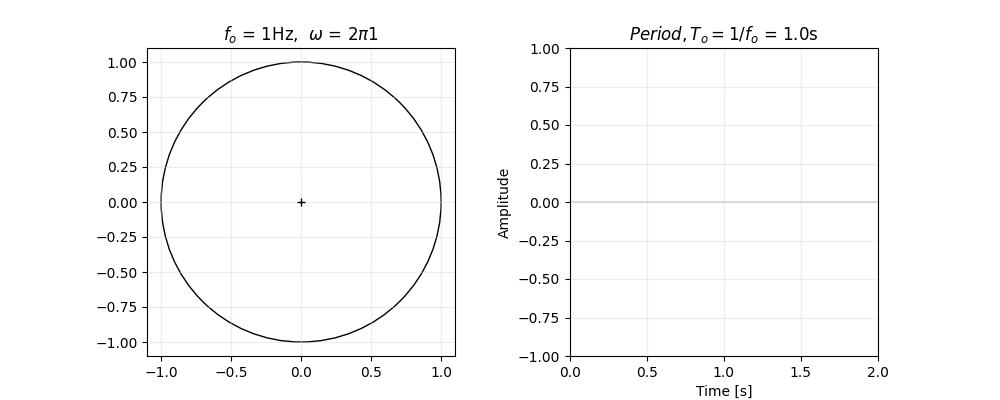

In [29]:
fo = 1  # frequency (Hz) !!! Change this to see how things vary !!!

omega_o = 2*np.pi*fo            # angular frequency
T = np.abs((2*np.pi)/omega_o)   # period (we use the absolute value in case the freq. is negative)
Np = 2                          # number of periods
dt = 0.01
t = np.arange(0,Np*T,dt) # time
N_frames =  int(np.round((Np*T)/dt))
xcos = np.cos(omega_o*t) # What happens if the argument is negative here?
ysin = np.sin(omega_o*t) # What happens if the argument is negative here?

# Unit circle
xO,yO = (0,0)  # origin
UnitCircle = patches.Circle((0.0, 0.0), radius=1,edgecolor="black",facecolor="none")

# SEtting up plots,
fig, axes = plt.subplots(1,2,figsize=(10,4))

axes[0].add_patch(UnitCircle) 
axes[0].plot(xO,yO,'k+')
line_mainstem, = axes[0].plot([], [], 'k--',lw=1)
line_mainpt, = axes[0].plot([], [], 'g-o',lw=1)
line_mainstem_cos, = axes[0].plot([], [], 'orange',lw=1)
line_mainpt_cos, = axes[0].plot([], [], 'orange',marker='d',lw=1)
line_mainstem_sin, = axes[0].plot([], [], 'purple',lw=1)
line_mainpt_sin, = axes[0].plot([], [], 'purple',marker='d',lw=1)

# time_text = axes[0].text(0.02, 0.95, '', transform=ax1.transAxes)
axes[0].set_title('$f_{o}$ = '+str(fo)+'Hz,  $\omega$ = $2 \pi$'+str(fo))
axes[0].grid(color='lightgrey',alpha=0.4)
axes[0].set_aspect('equal')

line_cos, = axes[1].plot([], [], 'orange',lw=1)
line_cospt, = axes[1].plot([], [], 'orange',marker='d',lw=1)
line_sin, = axes[1].plot([], [], 'purple',lw=1)
line_sinpt, = axes[1].plot([], [], 'purple',marker='d',lw=1)
axes[1].set_xlabel('Time [s]')
axes[1].set_ylabel('Amplitude')
axes[1].set_xlim(0,2)
axes[1].set_ylim(-1,1)
axes[1].set_aspect('equal')
axes[1].set_title('$Period, T_{o} = 1/f_{o}$ = '+str(T)+'s')

axes[1].grid(color='lightgrey',alpha=0.4)
axes[1].axhline(y=0, color='lightgrey',alpha=0.8)

# This is a line to connect the tip of the sum phasor to the point on the cosine plot
# connector = Line2D([0,1], [0,1], transform=fig.transFigure, color='k', linestyle='--', alpha=0.2)
# fig.add_artist(connector)

def animate(i): # animate is in the matplotlib library that can do animations. i is a running index over which you update, in this case it is time.
 	
    x = xcos[i]
    y = ysin[i]
    
    line_mainstem.set_data([xO, x],[yO, y])
    line_mainpt.set_data([x,x],[y,y])
    
    line_mainstem_cos.set_data([xO, x],[0, 0])
    line_mainpt_cos.set_data([x,x],[0,0])

    line_mainstem_sin.set_data([0, 0],[yO, y])
    line_mainpt_sin.set_data([0,0],[y,y])
    
    # # Sin and cosine waves    
    line_cos.set_data(t[0:i+1],xcos[0:i+1])
    line_sin.set_data(t[0:i+1],ysin[0:i+1])
    
    line_cospt.set_data([t[i],t[i]],[x,x])
    line_sinpt.set_data([t[i],t[i]],[y,y])
    
    return line_mainstem,line_mainpt, line_mainstem_cos, line_mainpt_cos, line_mainstem_sin, line_mainpt_sin, line_cos, line_sin, line_cospt, line_sinpt
    
anim = animation.FuncAnimation(fig, animate, frames=N_frames, interval=40, blit=True) # this calls the function to do the animation
#plt.close(fig)

#HTML(controls_css + anim.to_jshtml())

### A mathematical representation of sound

The sinusoidal model is mathematically defined as

$\begin{equation}
y(t) = A\cos(2 \pi f_{o}t +\theta)
\end{equation}$

where $A$ is the amplitude, $f_{o}$ is the fundamental frequency (Hz), $t$ is the time (seconds), and $\theta$ is a phase offset (radians). This is one of the most fundamental and useful models in audio signal processing and is the building block of many other types of sounds. 

Let's have a look at how the parameters affect the look and sound of this signal. Running the following cell brings up a number of sliders which correspond to the parameters, $A$, $f_{o}$, and $\theta$. Play around with these to observe how the waveform changes visually and listen to the resulting sounds!


Move the slider to see how the parameters change the sinusoid and listen to the result


interactive(children=(FloatSlider(value=0.5, description='A', max=1.0, min=0.1), IntSlider(value=100, descript…

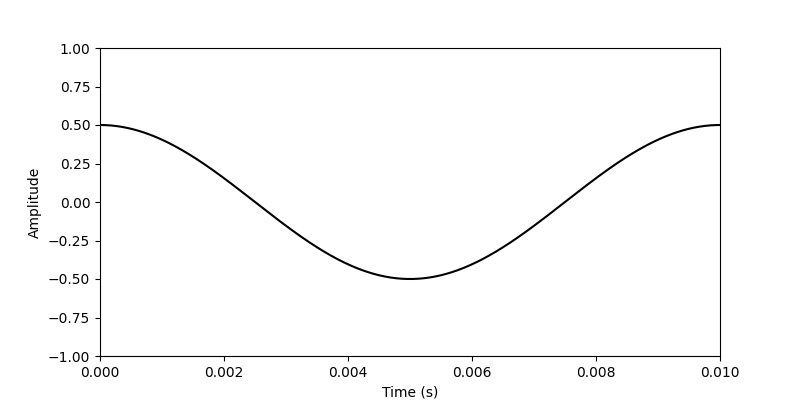

In [26]:
# Setting up the plots
fig, axes = plt.subplots(figsize=(8,4))

dt = 0.00001 # time spacing
t = np.arange(0,2,dt) # range of times to plot on x-axis
line, = axes.plot([], [], 'k')
axes.set_ylabel('Amplitude', color='k')
axes.set_xlabel('Time (s)', color='k')
axes.set_xlim([0, 0.01])
axes.set_ylim([-1, 1])

# Create the interactive plot
def update_sinusoid(A = 0.5, fo=100, theta = 0):
    
    y = A*np.cos(2*np.pi*fo*t + theta)

    line.set_data(t, y)
    fig.canvas.draw_idle()
    IPython.display.display(Audio(y.T, rate=1/dt,normalize=False))

print('Move the slider to see how the parameters change the sinusoid and listen to the result')
interact(update_sinusoid, A = (0.1,1,0.1), fo = (30,2000,10), theta = (-4*np.pi,4*np.pi,np.pi/16));
plt.show()

### A glimpse into modulation

We can do some basic [modulation](https://en.wikipedia.org/wiki/Frequency_modulation) of the sinusoid by making the phase offset some function of time. In the following, I've made the phase offset a sinusoidal signal with some frequency $f_2$. This is simply one option to make more complex sounds from the basic sinusoidal model, but you have complete liberty to modify the parts of this code as you wish to try different functions for the phase offset, introduce additional parameters, whatever you like really, and then see and hear the immediate impact these modifications. 

Move the slider to see how the parameters change the cosine and listen to the result


interactive(children=(FloatSlider(value=0.5, description='A', max=1.0, min=0.1), IntSlider(value=100, descript…

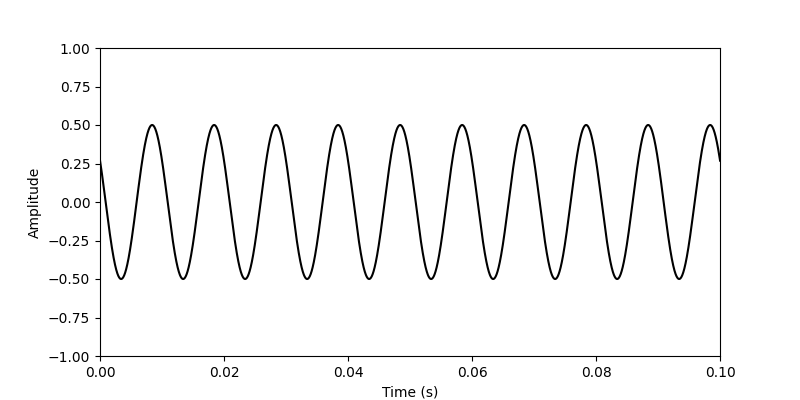

In [27]:
# Setting up the plots - some wildness with phase
fig, axes = plt.subplots(figsize=(8,4))

dt = 0.00001            # time spacing
t = np.arange(0,2,dt)   # range of times to plot on x-axis
line, = axes.plot([], [], 'k')
axes.set_ylabel('Amplitude', color='k')
axes.set_xlabel('Time (s)', color='k')
axes.set_xlim([0, 0.1])
axes.set_ylim([-1, 1])

# Create the interactive plot
def update_sinusoid(A = 0.5, fo=100, f2 = 0.1):
    
    theta = np.cos(2*np.pi*f2*t)        # !!! Change this to any function of f2 and time that you like !!!
    y = A*np.cos(2*np.pi*fo*t + theta)

    line.set_data(t, y)
    fig.canvas.draw_idle()
    IPython.display.display(Audio(y.T, rate=1/dt,normalize=False))

print('Move the slider to see how the parameters change the cosine and listen to the result')
interact(update_sinusoid, A = (0.1,1,0.1), fo = (30,2000,10), f2 = (0.1,100,0.1))
plt.show()
